<a href="https://colab.research.google.com/github/husseintarhini/INDE431/blob/main/time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Time Series Forecasting


In [38]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [87]:
passengers_df = pd.read_csv("sample_data/Passengers.csv")

Check the first few elements of the array to get a feel for the data

In [88]:
passengers_df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Notice that the Month column of type object. We need to specify that this column is of type datetime.

In [89]:
passengers_df.dtypes

Month          object
#Passengers     int64
dtype: object

In [90]:
passengers_df["Month"]=pd.to_datetime(passengers_df["Month"]) # changing the type of the Month column

In [9]:
passengers_df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [10]:
passengers_df.set_index("Month", inplace=True) # Set the month column as the index

In [11]:
passengers_df.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0.5, 0, 'Year')

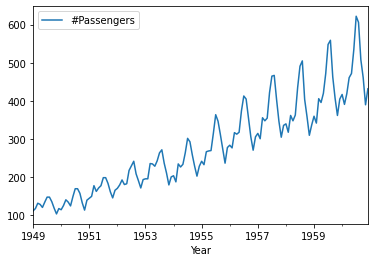

In [13]:
ax=passengers_df.plot() # plotting the data
ax.set_xlabel("Year")

In [44]:
series_decompose=seasonal_decompose(passengers_df["#Passengers"],model="additive") # to get the seasonal and trend components of a time series

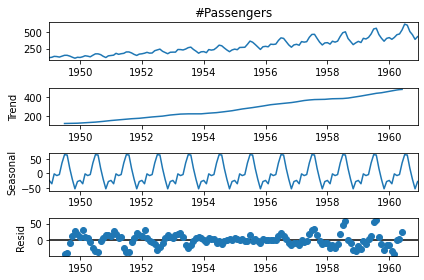

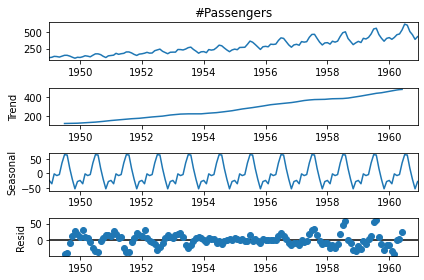

In [45]:
series_decompose.plot()

We can retrieve the trend and the seasonaility components

In [47]:
series_decompose.trend['1950']

Month
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
1950-04-01    136.416667
1950-05-01    137.416667
1950-06-01    138.750000
1950-07-01    140.916667
1950-08-01    143.166667
1950-09-01    145.708333
1950-10-01    148.416667
1950-11-01    151.541667
1950-12-01    154.708333
Name: trend, dtype: float64

In [48]:
series_decompose.seasonal['1950']

Month
1950-01-01   -24.748737
1950-02-01   -36.188131
1950-03-01    -2.241162
1950-04-01    -8.036616
1950-05-01    -4.506313
1950-06-01    35.402778
1950-07-01    63.830808
1950-08-01    62.823232
1950-09-01    16.520202
1950-10-01   -20.642677
1950-11-01   -53.593434
1950-12-01   -28.619949
Name: seasonal, dtype: float64

To forecast future values, ExponentialSmoothing is used

In [59]:
forecast_model=ExponentialSmoothing(passengers_df["#Passengers"],trend="add",seasonal="add",seasonal_periods=12).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [80]:
forecast_values=forecast_model.predict("1960-12-01","1962-01-01") #predicting the values between these two dates

In [81]:
forecast_values.tail()

1961-09-01    534.376143
1961-10-01    484.932835
1961-11-01    418.461732
1961-12-01    471.061682
1962-01-01    482.716359
Freq: MS, dtype: float64

In [82]:
passengers_df['#Passengers'].tail()

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

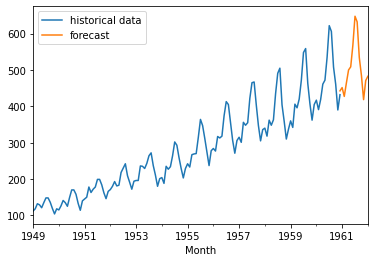

In [83]:
passengers_df['#Passengers'].plot(legend=True,label="historical data")
forecast_values.plot(legend=True,label="forecast")